soybean-large.data — основной обучающий набор данных

soybean-large.test — тестовый набор

soybean-large.names — описание признаков и классов

Остальные файлы — документация, резервные копии, вспомогательные списки (необязательны для анализа)

##Data sets description:

1. Title: Large Soybean Database

2. Sources:
     (a) R.S. Michalski and R.L. Chilausky "Learning by Being Told and
         Learning from Examples: An Experimental Comparison of the Two
	 Methods of Knowledge Acquisition in the Context of Developing
	 an Expert System for Soybean Disease Diagnosis", International
	 Journal of Policy Analysis and Information Systems, Vol. 4,
	 No. 2, 1980.
     (b) Donor: Ming Tan & Jeff Schlimmer (Jeff.Schlimmer%cs.cmu.edu)
     (c) Date: 11 July 1988

3. Past Usage:
      1. See above.
      2. Tan, M., & Eshelman, L. (1988). Using weighted networks to represent
         classification knowledge in noisy domains.  Proceedings of the Fifth
         International Conference on Machine Learning (pp. 121-134). Ann Arbor,
         Michigan: Morgan Kaufmann.
         -- IWN recorded a 97.1% classification accuracy
            -- 290 training and 340 test instances
      3. Fisher,D.H. & Schlimmer,J.C. (1988). Concept Simplification and
         Predictive Accuracy. Proceedings of the Fifth
         International Conference on Machine Learning (pp. 22-28). Ann Arbor,
         Michigan: Morgan Kaufmann.
         -- Notes why this database is highly predictable

4. Relevant Information Paragraph:
    There are 19 classes, only the first 15 of which have been used in prior
    work.  The folklore seems to be that the last four classes are
    unjustified by the data since they have so few examples.
    There are 35 categorical attributes, some nominal and some ordered.  The
    value ``dna'' means does not apply.  The values for attributes are
    encoded numerically, with the first value encoded as ``0,'' the second as
    ``1,'' and so forth.  An unknown values is encoded as ``?''.

5. Number of Instances: 307

6. Number of Attributes: 35 (all have been nominalized)

7. Attribute Information:
    -- 19 Classes
     diaporthe-stem-canker, charcoal-rot, rhizoctonia-root-rot,
     phytophthora-rot, brown-stem-rot, powdery-mildew,
     downy-mildew, brown-spot, bacterial-blight,
     bacterial-pustule, purple-seed-stain, anthracnose,
     phyllosticta-leaf-spot, alternarialeaf-spot,
     frog-eye-leaf-spot, diaporthe-pod-&-stem-blight,
     cyst-nematode, 2-4-d-injury, herbicide-injury.

    1. date:		april,may,june,july,august,september,october,?.
    2. plant-stand:	normal,lt-normal,?.
    3. precip:		lt-norm,norm,gt-norm,?.
    4. temp:		lt-norm,norm,gt-norm,?.
    5. hail:		yes,no,?.
    6. crop-hist:	diff-lst-year,same-lst-yr,same-lst-two-yrs,
                        same-lst-sev-yrs,?.
    7. area-damaged:	scattered,low-areas,upper-areas,whole-field,?.
    8. severity:	minor,pot-severe,severe,?.
    9. seed-tmt:	none,fungicide,other,?.
   10. germination:	90-100%,80-89%,lt-80%,?.
   11. plant-growth:	norm,abnorm,?.
   12. leaves:		norm,abnorm.
   13. leafspots-halo:	absent,yellow-halos,no-yellow-halos,?.
   14. leafspots-marg:	w-s-marg,no-w-s-marg,dna,?.
   15. leafspot-size:	lt-1/8,gt-1/8,dna,?.
   16. leaf-shread:	absent,present,?.
   17. leaf-malf:	absent,present,?.
   18. leaf-mild:	absent,upper-surf,lower-surf,?.
   19. stem:		norm,abnorm,?.
   20. lodging:    	yes,no,?.
   21. stem-cankers:	absent,below-soil,above-soil,above-sec-nde,?.
   22. canker-lesion:	dna,brown,dk-brown-blk,tan,?.
   23. fruiting-bodies:	absent,present,?.
   24. external decay:	absent,firm-and-dry,watery,?.
   25. mycelium:	absent,present,?.
   26. int-discolor:	none,brown,black,?.
   27. sclerotia:	absent,present,?.
   28. fruit-pods:	norm,diseased,few-present,dna,?.
   29. fruit spots:	absent,colored,brown-w/blk-specks,distort,dna,?.
   30. seed:		norm,abnorm,?.
   31. mold-growth:	absent,present,?.
   32. seed-discolor:	absent,present,?.
   33. seed-size:	norm,lt-norm,?.
   34. shriveling:	absent,present,?.
   35. roots:		norm,rotted,galls-cysts,?.


In [1]:
!pip install tensorflow==2.18.0
!pip uninstall autokeras
!pip install git+https://github.com/keras-team/autokeras.git@master

Found existing installation: autokeras 2.1.0.dev0
Uninstalling autokeras-2.1.0.dev0:
  Would remove:
    /usr/local/lib/python3.11/dist-packages/autokeras-2.1.0.dev0.dist-info/*
    /usr/local/lib/python3.11/dist-packages/autokeras/*
Proceed (Y/n)? y
  Successfully uninstalled autokeras-2.1.0.dev0
  Cloning https://github.com/keras-team/autokeras.git (to revision master) to /tmp/pip-req-build-3dmhmv7_
  Running command git clone --filter=blob:none --quiet https://github.com/keras-team/autokeras.git /tmp/pip-req-build-3dmhmv7_
  Resolved https://github.com/keras-team/autokeras.git to commit db78b445ee3aa3aedb19a71d2d1e330cc87f12b3
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for autokeras: filename=autokeras-2.1.0.dev0-py3-none-any.whl size=120425 sha256=b44879484fb1cf8e42b13dac46f57ac4e094c707c304417f07f753bf17697ee1
  Stored in directory: /tmp/pip-ephem-wheel-cache-vtzlbqpq/wheels

In [2]:
import autokeras as ak
from tensorflow.keras.models import load_model
from tensorflow import  keras
from sklearn.utils.class_weight import compute_class_weight

In [3]:
# Импортируем библиотеки:
import pandas as pd  # для чтения и работы с таблицами
import numpy as np  # для работы с числовыми массивами и пропущенными значениями
import matplotlib.pyplot as plt  # для построения графиков
import seaborn as sns  # для красивых визуализаций
from sklearn.model_selection import train_test_split  # для разделения данных на обучение и тест
from sklearn.preprocessing import LabelEncoder, StandardScaler  # для кодирования категорий и масштабирования данных
from sklearn.impute import SimpleImputer  # для заполнения пропущенных значений
from sklearn.metrics import classification_report, f1_score, roc_auc_score  # для оценки качества моделей
from sklearn.decomposition import PCA  # метод понижения размерности (до 2D)
from sklearn.manifold import TSNE  # метод понижения размерности (до 3D)
from sklearn.ensemble import RandomForestClassifier  # модель случайного леса
from sklearn.linear_model import LogisticRegression  # логистическая регрессия
from tensorflow.keras.utils import to_categorical  # преобразование классов в формат для нейросети
from mpl_toolkits.mplot3d import Axes3D  # для 3D-графиков
from sklearn.utils import class_weight
from sklearn.metrics import classification_report, f1_score

##Скачивание данных

In [4]:
def read_data(data_path = "/content/soybean-large.data"):
  # Загружаем файл с данными в таблицу
  # Указываем имена колонок — 35 признаков + 1 целевой столбец
  # Загружаем файл с данными в таблицу
  columns = ['Target']+[f"feature_{i}" for i in range(1,36)]
  df = pd.read_csv(data_path, header=None, names=columns)
  df[columns[1:]]=df[columns[1:]].apply(pd.to_numeric, errors='coerce')
  # Заполняем пропуски самым частым значением в каждом столбце
  imputer = SimpleImputer(strategy="most_frequent")
  df = pd.DataFrame(imputer.fit_transform(df), columns=columns)
  print("Дубликаты", df.duplicated().sum())
  # Приводим к int
  df[columns[1:]] = df[columns[1:]].astype(int)
  display(df.head())
  display(df.describe())
  display(df.info())
  display(df['Target'].unique())

  # Построение bar plot для количества объектов каждого класса
  value_counts = df['Target'].value_counts()  # Подсчёт, сколько раз встречается каждый класс
  plt.figure(figsize=(10, 5))  # Размер графика
  value_counts.plot(kind='bar')  # Строим столбчатую диаграмму
  plt.title("Распределение классов (Target)")  # Заголовок
  plt.xlabel("Класс заболевания")  # Подпись по X
  plt.ylabel("Количество образцов")  # Подпись по Y
  plt.xticks(rotation=45, ha='right')  # Поворот подписей классов
  plt.tight_layout()
  plt.show()

  return df

# Тенеровочные данные

Дубликаты 4


,Target,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35
0,diaporthe-stem-canker,6,0,2,1,0,1,1,1,0,...,0,0,0,4,0,0,0,0,0,0
1,diaporthe-stem-canker,4,0,2,1,0,2,0,2,1,...,0,0,0,4,0,0,0,0,0,0
2,diaporthe-stem-canker,3,0,2,1,0,1,0,2,1,...,0,0,0,4,0,0,0,0,0,0
3,diaporthe-stem-canker,3,0,2,1,0,1,0,2,0,...,0,0,0,4,0,0,0,0,0,0
4,diaporthe-stem-canker,6,0,2,1,0,2,0,1,0,...,0,0,0,4,0,0,0,0,0,0


,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35
count,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,...,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000
mean,3.534202,0.452769,1.592834,1.127036,0.179153,1.817590,1.631922,0.807818,0.475570,1.013029,...,0.130293,0.032573,0.504886,0.960912,0.166124,0.100977,0.091205,0.087948,0.052117,0.153094
std,1.711544,0.498577,0.705034,0.615820,0.384107,0.993089,1.077711,0.582033,0.617201,0.749614,...,0.423139,0.177807,0.937147,1.522737,0.372799,0.301790,0.288371,0.283681,0.222626,0.419323
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,2.000000,1.000000,0.000000,2.000000,2.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,1.000000,2.000000,2.000000,0.000000,3.000000,3.000000,1.000000,1.000000,2.000000,...,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,6.000000,1.000000,2.000000,2.000000,1.000000,3.000000,3.000000,2.000000,2.000000,2.000000,...,2.000000,1.000000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 36 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Target      307 non-null    object
 1   feature_1   307 non-null    int64 
 2   feature_2   307 non-null    int64 
 3   feature_3   307 non-null    int64 
 4   feature_4   307 non-null    int64 
 5   feature_5   307 non-null    int64 
 6   feature_6   307 non-null    int64 
 7   feature_7   307 non-null    int64 
 8   feature_8   307 non-null    int64 
 9   feature_9   307 non-null    int64 
 10  feature_10  307 non-null    int64 
 11  feature_11  307 non-null    int64 
 12  feature_12  307 non-null    int64 
 13  feature_13  307 non-null    int64 
 14  feature_14  307 non-null    int64 
 15  feature_15  307 non-null    int64 
 16  feature_16  307 non-null    int64 
 17  feature_17  307 non-null    int64 
 18  feature_18  307 non-null    int64 
 19  feature_19  307 non-null    int64 
 20  feature_20

None

array(['diaporthe-stem-canker', 'charcoal-rot', 'rhizoctonia-root-rot',
       'phytophthora-rot', 'brown-stem-rot', 'powdery-mildew',
       'downy-mildew', 'brown-spot', 'bacterial-blight',
       'bacterial-pustule', 'purple-seed-stain', 'anthracnose',
       'phyllosticta-leaf-spot', 'alternarialeaf-spot',
       'frog-eye-leaf-spot', 'diaporthe-pod-&-stem-blight',
       'cyst-nematode', '2-4-d-injury', 'herbicide-injury'], dtype=object)

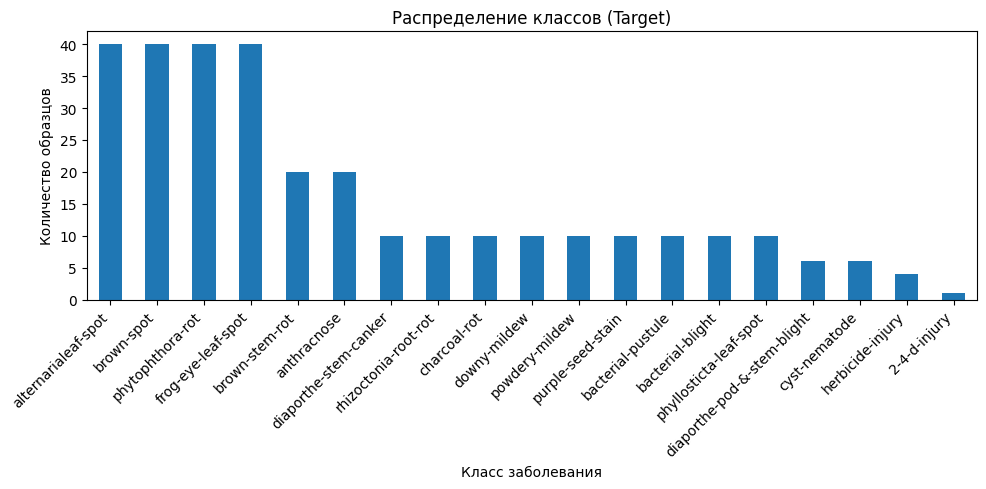

In [5]:
df_data=read_data()

## Тестовые данные

Дубликаты 26


,Target,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35
0,diaporthe-stem-canker,6,0,2,1,0,1,0,1,0,...,0,0,0,4,0,0,0,0,0,0
1,diaporthe-stem-canker,3,0,2,1,0,2,0,2,1,...,0,0,0,4,0,0,0,0,0,0
2,diaporthe-stem-canker,4,0,2,1,0,3,0,2,0,...,0,0,0,4,0,0,0,0,0,0
3,diaporthe-stem-canker,5,0,2,1,0,1,0,1,0,...,0,0,0,4,0,0,0,0,0,0
4,diaporthe-stem-canker,3,0,2,1,0,3,0,1,0,...,0,0,0,4,0,0,0,0,0,0


,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35
count,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,...,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000
mean,3.574468,0.409574,1.640957,1.212766,0.191489,1.984043,1.537234,0.757979,0.388298,1.063830,...,0.117021,0.026596,0.390957,0.781915,0.170213,0.095745,0.095745,0.085106,0.058511,0.183511
std,1.681202,0.492410,0.646074,0.613142,0.393998,0.960422,1.070176,0.524026,0.564053,0.701366,...,0.396152,0.161113,0.754593,1.346717,0.376320,0.294633,0.294633,0.279412,0.235019,0.439205
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,2.000000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,1.000000,2.000000,2.000000,0.000000,3.000000,3.000000,1.000000,1.000000,2.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,6.000000,1.000000,2.000000,2.000000,1.000000,3.000000,3.000000,2.000000,2.000000,2.000000,...,2.000000,1.000000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376 entries, 0 to 375
Data columns (total 36 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Target      376 non-null    object
 1   feature_1   376 non-null    int64 
 2   feature_2   376 non-null    int64 
 3   feature_3   376 non-null    int64 
 4   feature_4   376 non-null    int64 
 5   feature_5   376 non-null    int64 
 6   feature_6   376 non-null    int64 
 7   feature_7   376 non-null    int64 
 8   feature_8   376 non-null    int64 
 9   feature_9   376 non-null    int64 
 10  feature_10  376 non-null    int64 
 11  feature_11  376 non-null    int64 
 12  feature_12  376 non-null    int64 
 13  feature_13  376 non-null    int64 
 14  feature_14  376 non-null    int64 
 15  feature_15  376 non-null    int64 
 16  feature_16  376 non-null    int64 
 17  feature_17  376 non-null    int64 
 18  feature_18  376 non-null    int64 
 19  feature_19  376 non-null    int64 
 20  feature_20

None

array(['diaporthe-stem-canker', 'charcoal-rot', 'rhizoctonia-root-rot',
       'phytophthora-rot', 'brown-stem-rot', 'powdery-mildew',
       'downy-mildew', 'brown-spot', 'bacterial-blight',
       'bacterial-pustule', 'purple-seed-stain', 'anthracnose',
       'phyllosticta-leaf-spot', 'alternarialeaf-spot',
       'frog-eye-leaf-spot', 'diaporthe-pod-&-stem-blight',
       'cyst-nematode', '2-4-d-injury', 'herbicide-injury'], dtype=object)

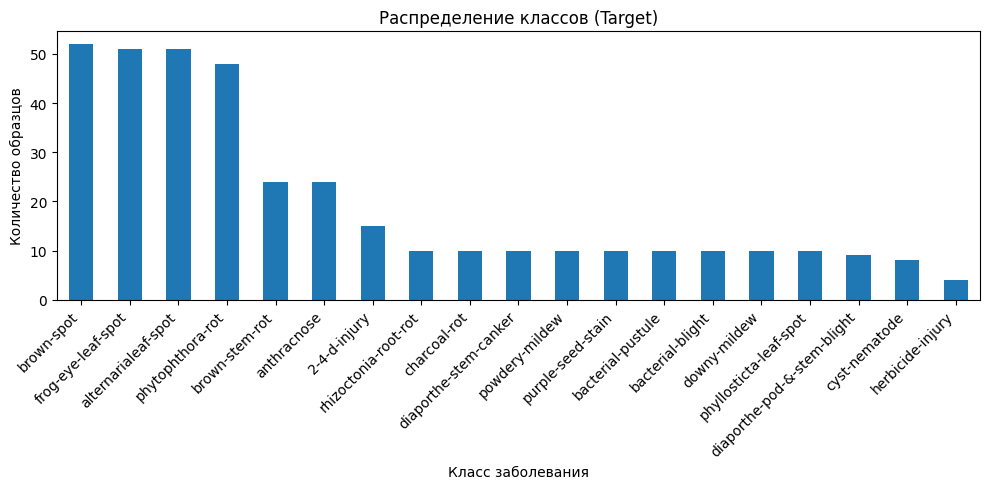

In [6]:
df_test=read_data(data_path = "/content/soybean-large.test")

In [7]:
X_train = df_data.drop('Target', axis=1).apply(LabelEncoder().fit_transform)  # входные признаки
y_train = LabelEncoder().fit_transform(df_data['Target'])  # целевая переменная (класс заболевания)
X_test = df_test.drop('Target', axis=1).apply(LabelEncoder().fit_transform)  # входные признаки
y_test = LabelEncoder().fit_transform(df_test['Target'])  # целевая переменная (класс заболевания)

In [8]:
# Масштабируем признаки — приводим их к одному масштабу (нужно для нейросети)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:

# МАССИВ ВЕСОВ ДЛЯ БАЛАНСИРОВКИ КЛАССОВ
weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(weights))


clf=ak.AutoModel(
    inputs=ak.Input(),# Базовый универсальный вход
    outputs=ak.ClassificationHead(),# Выход для классификации
    max_trials=10,    # сколько разных моделей попробовать
    overwrite=False)   # перезаписать старые модели

history=clf.fit(x=X_train_scaled,
                 y=np.array(y_train),
                 verbose=2,
                 epochs=10,
                 validation_data=(X_test_scaled, np.array(y_test)),
                 class_weight=class_weights)

# Получаем лучшую найденную модель
best_model_NN = clf.export_model()
best_model_NN.summary()  # показать архитектуру нейросети

Reloading Tuner from ./auto_model/tuner0.json
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 35))
  warnings.warn(msg)


10/10 - 3s - 267ms/step - accuracy: 0.0033 - loss: 3.0706 - val_accuracy: 0.1941 - val_loss: 2.8427
Epoch 2/10
10/10 - 0s - 43ms/step - accuracy: 0.1694 - loss: 2.7237 - val_accuracy: 0.1755 - val_loss: 2.6938
Epoch 3/10
10/10 - 0s - 29ms/step - accuracy: 0.2313 - loss: 2.4709 - val_accuracy: 0.3910 - val_loss: 2.4672
Epoch 4/10
10/10 - 0s - 18ms/step - accuracy: 0.3876 - loss: 2.0461 - val_accuracy: 0.5771 - val_loss: 2.1141
Epoch 5/10
10/10 - 0s - 19ms/step - accuracy: 0.5993 - loss: 1.4652 - val_accuracy: 0.7261 - val_loss: 1.6273
Epoch 6/10
10/10 - 0s - 29ms/step - accuracy: 0.7264 - loss: 0.9431 - val_accuracy: 0.8112 - val_loss: 1.1607
Epoch 7/10
10/10 - 0s - 31ms/step - accuracy: 0.7915 - loss: 0.6296 - val_accuracy: 0.8005 - val_loss: 0.8358
Epoch 8/10
10/10 - 0s - 20ms/step - accuracy: 0.8176 - loss: 0.4356 - val_accuracy: 0.8245 - val_loss: 0.6585
Epoch 9/10
10/10 - 0s - 18ms/step - accuracy: 0.8599 - loss: 0.3060 - val_accuracy: 0.8457 - val_loss: 0.5407
Epoch 10/10
10/10 - 

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 35)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cast (Cast)                     │ (None, 35)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cast_to_float32 (CastToFloat32) │ (None, 35)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │         9,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1024)           │        33,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 19)             │        19,475 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ classification_head_1 (Softmax) │ (None, 19)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 70,707 (276.20 KB)

 Trainable params: 70,707 (276.20 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
# Создаём три модели: логистическую регрессию, случайный лес и нейросеть

models = {
    'LogReg': LogisticRegression(max_iter=1000, class_weight='balanced'),  # логистическая регрессия
    'RandomForest': RandomForestClassifier(n_estimators=100, class_weight='balanced'),  # 100 деревьев
    'NeuralNet':best_model_NN
    }

In [47]:
# Обучаем логистическую регрессию и случайный лес
models['LogReg'].fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [48]:
models['RandomForest'].fit(X_train_scaled, y_train)

RandomForestClassifier(class_weight='balanced')

In [49]:
# Оцениваем каждую модель по F1 и AUC
results = {}
for name, model in models.items():
    if name == 'NeuralNet':
        y_pred = np.argmax(model.predict(X_test_scaled), axis=1)  # получаем предсказания
    else:
        y_pred = model.predict(X_test_scaled)
    f1 = f1_score(y_test, y_pred, average='macro')  # макро-F1
    auc = roc_auc_score(to_categorical(y_test), to_categorical(y_pred), average='macro', multi_class='ovr')  # AUC
    results[name] = {'F1': f1, 'AUC': auc}
    print(f"\n{name}:\n", classification_report(y_test, y_pred, zero_division=0))  # печатаем отчёт


LogReg:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.84      0.94      0.89        51
           2       1.00      1.00      1.00        24
           3       1.00      0.90      0.95        10
           4       0.91      1.00      0.95        10
           5       0.94      0.85      0.89        52
           6       1.00      1.00      1.00        24
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00         8
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00        10
          11       1.00      1.00      1.00        10
          12       0.75      0.80      0.77        51
          13       1.00      1.00      1.00         4
          14       0.90      0.90      0.90        10
          15       1.00      0.88      0.93        48
          16       1.00      1.00      1.00        10
          17     

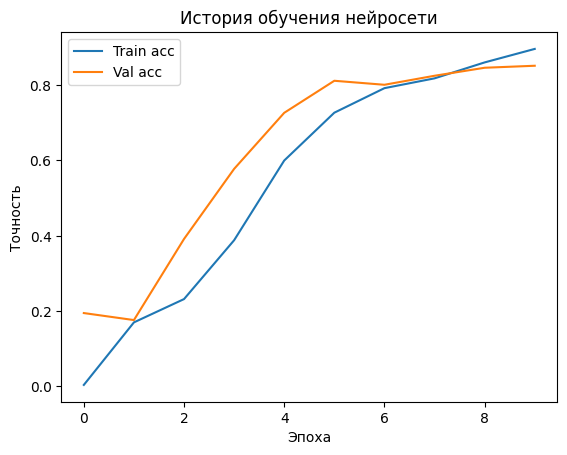

In [50]:
# Строим график точности обучения нейросети
plt.plot(history.history['accuracy'], label='Train acc')
plt.plot(history.history['val_accuracy'], label='Val acc')
plt.xlabel("Эпоха")
plt.ylabel("Точность")
plt.title("История обучения нейросети")
plt.legend()
plt.show()

In [51]:
# PCA (Principal Component Analysis) — снижаем размерность до 2-х признаков
pca = PCA(n_components=2)
X_2D = pca.fit_transform(X_test_scaled)
y_pred_nn = np.argmax(models['NeuralNet'].predict(X_test_scaled), axis=1)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


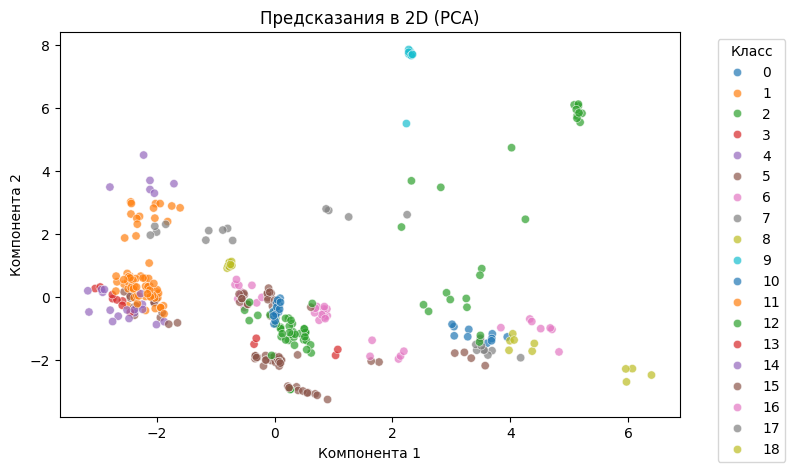

In [52]:
# Строим 2D-график предсказаний
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_2D[:, 0], y=X_2D[:, 1], hue=y_pred_nn, palette='tab10', alpha=0.7)
plt.title("Предсказания в 2D (PCA)")
plt.xlabel("Компонента 1")
plt.ylabel("Компонента 2")
plt.legend(title="Класс", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


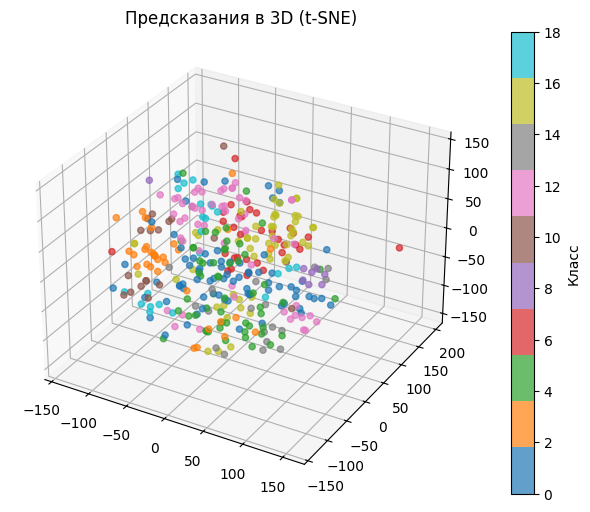

In [53]:
# t-SNE — другой способ снижения размерности до 3D
tsne = TSNE(n_components=3, perplexity=30, learning_rate=200, random_state=42)
X_3D = tsne.fit_transform(X_test_scaled)

# 3D-график предсказаний
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_3D[:, 0], X_3D[:, 1], X_3D[:, 2], c=y_pred_nn, cmap='tab10', alpha=0.7)
ax.set_title("Предсказания в 3D (t-SNE)")
plt.colorbar(scatter, ax=ax, label="Класс")
plt.show()


In [54]:
# Выводим лучшую модель по F1
best_model = max(results.items(), key=lambda x: x[1]['F1'])
print(f"\nЛучшая модель: {best_model[0]} | F1: {best_model[1]['F1']:.3f} | AUC: {best_model[1]['AUC']:.3f}")


Лучшая модель: RandomForest | F1: 0.967 | AUC: 0.980
